In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("D:\\Ultimate Programming\\Data Bases\\Student Scores.csv")
df = pd.DataFrame(data)
print(df.head(3))

   Sl No.  Gender EthnicGroup         ParentEduc LunchType TestPrep  \
0       0  female         NaN  bachelor's degree  standard     none   
1       1  female     group C       some college  standard      NaN   
2       2  female     group B    master's degree  standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         05-Oct         69            90            88  
2            < 5         87            93            91  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl No.               30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [3]:
df.isnull().sum()

Sl No.                    0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [4]:
gp = df.groupby("TransportMeans")["Sl No."].count()
print(gp)

TransportMeans
private       11362
school_bus    16145
Name: Sl No., dtype: int64


In [5]:
df["EthnicGroup"] = df["EthnicGroup"].replace(np.nan, "group X")

In [6]:
df["TransportMeans"].bfill()

0        school_bus
1        school_bus
2        school_bus
3        school_bus
4        school_bus
            ...    
30636    school_bus
30637       private
30638       private
30639    school_bus
30640    school_bus
Name: TransportMeans, Length: 30641, dtype: object

In [7]:
gp = df.groupby("EthnicGroup").agg({"Sl No." : "count", "TransportMeans" : "count"})
print(gp)

             Sl No.  TransportMeans
EthnicGroup                        
group A        2219            1999
group B        5826            5238
group C        9212            8280
group D        7503            6713
group E        4041            3624
group X        1840            1653


In [8]:
df["TransportMeans"] = df["TransportMeans"].bfill()

In [9]:
df.isnull().sum()

Sl No.                    0
Gender                    0
EthnicGroup               0
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans            0
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

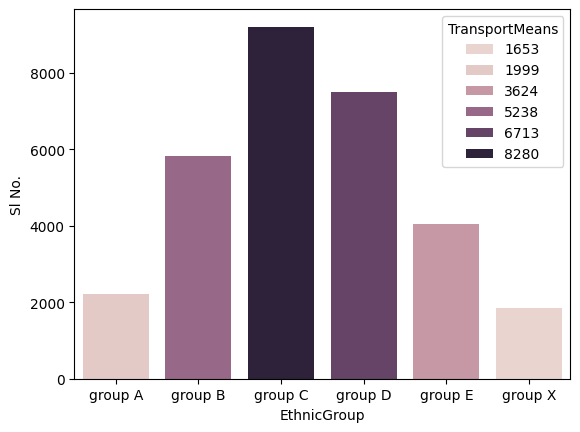

In [10]:
sns.barplot(data = gp, x = gp.index, y = gp["Sl No."], hue = gp["TransportMeans"])
plt.show()

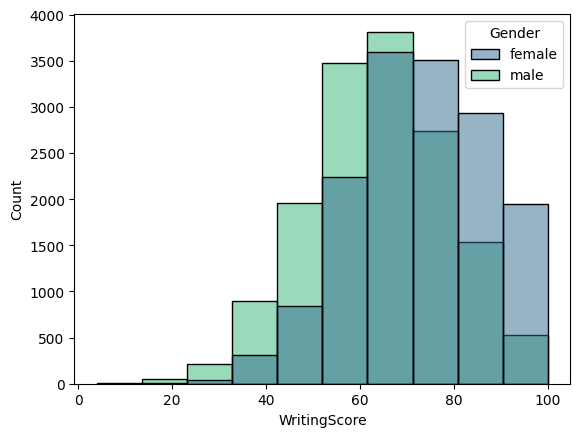

In [18]:
sns.histplot(data = df, x = "WritingScore", bins = 10, hue = "Gender", palette = "viridis")
plt.show()

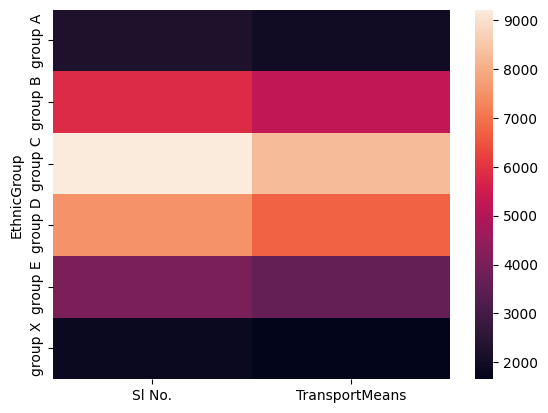

In [17]:
sns.heatmap(gp)
sns.color_palette("viridis")
plt.show()

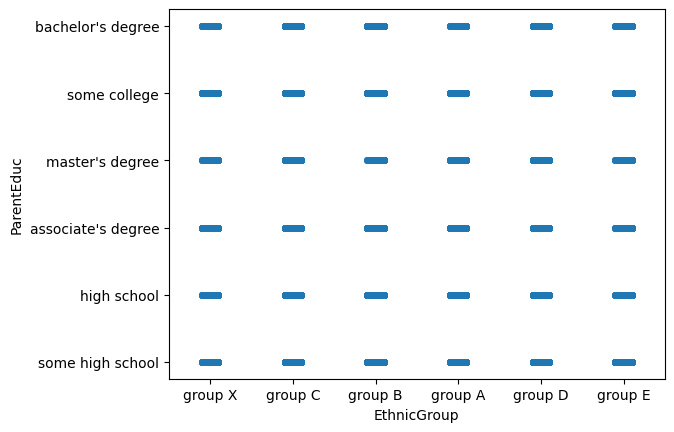

In [19]:
sns.stripplot(data = df, x = "EthnicGroup", y = "ParentEduc")
plt.show()